## Voting Data - JJ

In this notebook I will be analizing and cleaning voting data. 

The data is from https://github.com/tonmcg/US_County_Level_Election_Results_08-20

### Setup

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcol

import seaborn as sns
import numpy as np

### Load data

In [2]:
election_data_df=pd.read_csv("../data/2020_election.csv")
election_data_df.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


In [3]:
print(election_data_df.shape)

(3152, 10)


2020_election.csv, which I named election_data_df in my code cells has 10 columns and 3152 rows. Each row represents a different county or other municipality that voted in the 2020 election. The columns represent the state name, the Federal Information Processing Standards code, the county name, the number GOP and Democratic votes respectively, the total votes, the difference, the percentage of GOP and Democratic votes respectively as decimals, and the difference in percentage of votes as a decimal. 

In [4]:
election_data_cleaned_df = election_data_df[["state_name","county_name","votes_gop","votes_dem","total_votes","diff",
                                             "per_gop","per_dem","per_point_diff", "county_fips"]]
election_data_cleaned_df["outcome"]=election_data_cleaned_df["per_point_diff"]<0
dem_maj_map={False: "Rep", True: "Dem"}
election_data_cleaned_df["outcome"]=election_data_cleaned_df["outcome"].map(dem_maj_map)
election_data_cleaned_df["per_point_diff"]=np.abs(election_data_cleaned_df["per_point_diff"])
election_data_cleaned_df.head()


/tmp/ipykernel_1435685/2521835615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_data_cleaned_df["outcome"]=election_data_cleaned_df["per_point_diff"]<0
/tmp/ipykernel_1435685/2521835615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_data_cleaned_df["outcome"]=election_data_cleaned_df["outcome"].map(dem_maj_map)
/tmp/ipykernel_1435685/2521835615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,county_fips,outcome
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,1001,Rep
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1003,Rep
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,1005,Rep
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,1007,Rep
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,1009,Rep


I removed the county FIPS codes because they are useless for the analysis of the data

In [5]:
print(election_data_cleaned_df["per_point_diff"].max())
print(election_data_cleaned_df["per_point_diff"].min())
print()
diff_max_filter=election_data_cleaned_df["per_point_diff"]==election_data_cleaned_df["per_point_diff"].max()
diff_max=election_data_cleaned_df[diff_max_filter]
print(diff_max[["county_name", "state_name"]])
diff_min_filter=election_data_cleaned_df["per_point_diff"]==election_data_cleaned_df["per_point_diff"].min()
diff_min=election_data_cleaned_df[diff_min_filter]
print(diff_min[["county_name", "state_name"]])
print()
print(election_data_cleaned_df["total_votes"].max())
print(election_data_cleaned_df["total_votes"].min())
print()
total_max_filter=election_data_cleaned_df["total_votes"]==election_data_cleaned_df["total_votes"].max()
total_max=election_data_cleaned_df[total_max_filter]
print(total_max[["county_name", "state_name"]])
total_min_filter=election_data_cleaned_df["total_votes"]==election_data_cleaned_df["total_votes"].min()
total_min=election_data_cleaned_df[total_min_filter]
print(total_min[["county_name", "state_name"]])
print()
print(election_data_cleaned_df["state_name"].value_counts())

0.930909091
0.000234608

         county_name state_name
2729  Roberts County      Texas
         county_name state_name
1872  Ontario County   New York

4263443
66

            county_name  state_name
215  Los Angeles County  California
        county_name state_name
2683  Loving County      Texas

Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Colorado                 64
Louisiana                64

In [6]:
votes_undermill = election_data_cleaned_df['total_votes']<100000

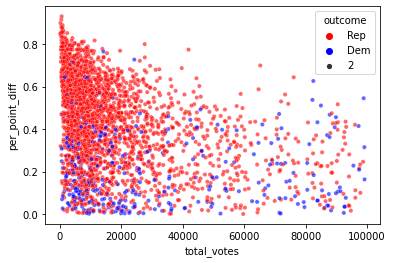

In [7]:
splot = sns.scatterplot(x='total_votes', y='per_point_diff',
                        hue="outcome",                     
                        data=election_data_cleaned_df[votes_undermill],           
                        palette=['red', 'blue'],
                        alpha=0.6,
                        size=2)

<AxesSubplot:>

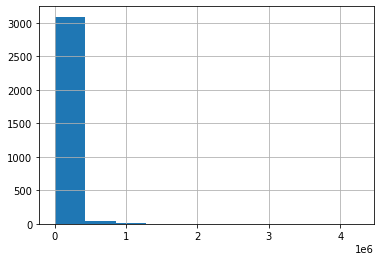

In [8]:
election_data_cleaned_df['total_votes'].hist()

In [9]:
total_votes_bystate = election_data_cleaned_df.groupby('state_name')['total_votes'].sum()

In [10]:
total_votes_bystate

state_name
Alabama                  2323304
Alaska                    391346
Arizona                  3387326
Arkansas                 1219069
California              17495906
Colorado                 3256953
Connecticut              1824280
Delaware                  504010
District of Columbia      344356
Florida                 11067456
Georgia                  4997716
Hawaii                    574469
Idaho                     868105
Illinois                 6038850
Indiana                  3033198
Iowa                     1690871
Kansas                   1349567
Kentucky                 2136768
Louisiana                2148062
Maine                     813740
Maryland                 3037030
Massachusetts            3631402
Michigan                 5539302
Minnesota                3277171
Mississippi              1315178
Missouri                 3025962
Montana                   605750
Nebraska                  956379
Nevada                   1405376
New Hampshire             804430

In [11]:
#election_data_cleaned_df=election_data_cleaned_df.set_index('state_name')
election_data_cleaned_df['state_proportion']=election_data_cleaned_df['total_votes']/total_votes_bystate

/tmp/ipykernel_1435685/268149584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_data_cleaned_df['state_proportion']=election_data_cleaned_df['total_votes']/total_votes_bystate


In [12]:
election_data_cleaned_df

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,county_fips,outcome,state_proportion
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,1001,Rep,NaN
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1003,Rep,NaN
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,1005,Rep,NaN
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,1007,Rep,NaN
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,1009,Rep,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3147,Wyoming,Sweetwater County,12229,3823,16603,8406,0.736554,0.230260,0.506294,56037,Rep,NaN
3148,Wyoming,Teton County,4341,9848,14677,-5507,0.295769,0.670982,0.375213,56039,Dem,NaN
3149,Wyoming,Uinta County,7496,1591,9402,5905,0.797277,0.169219,0.628058,56041,Rep,NaN
3150,Wyoming,Washakie County,3245,651,4012,2594,0.808824,0.162263,0.646560,56043,Rep,NaN


In [13]:
election_data_cleaned_df.groupby(election_data_cleaned_df.index)['state_proportion'].sum()

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3147    0.0
3148    0.0
3149    0.0
3150    0.0
3151    0.0
Name: state_proportion, Length: 3152, dtype: float64

In [14]:
election_data_cleaned_df.to_csv(r'../data/election_clean.csv', index = False)

<div class="alert alert-warning">
    
### Plotting data on map
    
</div>

In [15]:
# load geojson file into a GeoDataFrame
us_county_gdf = gpd.read_file('../data/us_counties_albers.geojson')

In [16]:
us_county_gdf.shape

(3143, 10)

* each row is a county

In [17]:
us_county_gdf.head()

,id,fips,state_fips,county_fips,name,lsad,census_area,state,iso_3166_2,geometry
0,0,01001,01,001,Autauga,County,594.436,Alabama,AL,"POLYGON ((-86.49415 32.34372, -86.71953 32.404..."
1,1,01009,01,009,Blount,County,644.776,Alabama,AL,"POLYGON ((-86.57506 33.76425, -86.75998 33.841..."
2,2,01017,01,017,Chambers,County,596.531,Alabama,AL,"POLYGON ((-85.18234 32.86995, -85.12455 32.772..."
3,3,01021,01,021,Chilton,County,692.854,Alabama,AL,"POLYGON ((-86.51727 33.01948, -86.51727 32.930..."
4,4,01033,01,033,Colbert,County,592.619,Alabama,AL,"POLYGON ((-88.14114 34.58091, -88.14114 34.586..."


* FIPS codes and county name and state name can be used to merge with other data frames

<AxesSubplot:>

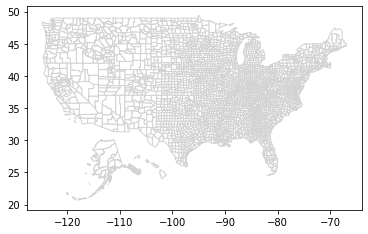

In [18]:
# use geometry column to plot outline of counties
us_county_gdf.plot(color='white', edgecolor='lightgray')

In [19]:
(us_county_gdf['state']=='California').sum()

58

In [20]:
(election_data_df['state_name']=='California').sum()

58

In [21]:
us_county_gdf[us_county_gdf['state']=='Hawaii']

,id,fips,state_fips,county_fips,name,lsad,census_area,state,iso_3166_2,geometry
3138,3138,15009,15,009,Maui,County,1161.521,Hawaii,HI,"MULTIPOLYGON (((-103.70951 26.42579, -103.6286..."
3139,3139,15001,15,001,Hawaii,County,4028.417,Hawaii,HI,"POLYGON ((-102.27057 25.41646, -102.26479 25.4..."
3140,3140,15007,15,007,Kauai,County,619.956,Hawaii,HI,"MULTIPOLYGON (((-107.42535 27.08142, -107.4195..."
3141,3141,15005,15,005,Kalawao,County,11.991,Hawaii,HI,"POLYGON ((-103.70951 26.42579, -103.69218 26.4..."
3142,3142,15003,15,003,Honolulu,County,600.743,Hawaii,HI,"POLYGON ((-104.78439 26.59257, -104.83062 26.5..."


In [22]:
election_data_df[election_data_df['state_name']=='Hawaii']

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
557,Hawaii,15001,Hawaii County,26897,58731,87814,-31834,0.306295,0.668811,-0.362516
558,Hawaii,15003,Honolulu County,136259,238869,382114,-102610,0.356593,0.625125,-0.268532
559,Hawaii,15007,Kauai County,11582,21225,33497,-9643,0.345762,0.633639,-0.287877
560,Hawaii,15009,Maui County,22126,47305,71044,-25179,0.311441,0.665855,-0.354414


In [23]:
pd.concat([us_county_gdf.groupby('state').size(),
        election_data_df.groupby('state_name').size()], axis=1)

,0,1
Alabama,67,67
Alaska,29,40
Arizona,15,15
Arkansas,75,75
California,58,58
Colorado,64,64
Connecticut,8,8
Delaware,3,3
District of Columbia,1,1
Florida,67,67


### Merge election data with map data

* `election_data_cleaned_df` doesn't include FIPS codes so need to use
   * `state_name`
   * `county_name`

In [24]:
election_data_cleaned_df.head()

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,county_fips,outcome,state_proportion
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,1001,Rep,NaN
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1003,Rep,NaN
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,1005,Rep,NaN
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,1007,Rep,NaN
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,1009,Rep,NaN


In [25]:
louisiana_filter=us_county_gdf['state'] == 'Louisiana'
us_county_gdf[louisiana_filter]

,id,fips,state_fips,county_fips,name,lsad,census_area,state,iso_3166_2,geometry
186,186,22001,22,001,Acadia,Parish,655.119,Louisiana,LA,"POLYGON ((-92.28462 30.14678, -92.42331 30.049..."
187,187,22013,22,013,Bienville,Parish,811.268,Louisiana,LA,"POLYGON ((-93.42884 32.23732, -93.37105 32.409..."
188,188,22033,22,033,East Baton Rouge,Parish,455.374,Louisiana,LA,"POLYGON ((-91.01904 30.32219, -91.14039 30.319..."
189,189,22053,22,053,Jefferson Davis,Parish,651.328,Louisiana,LA,"POLYGON ((-93.12834 30.42283, -93.06477 30.437..."
190,190,22073,22,073,Ouachita,Parish,610.406,Louisiana,LA,"POLYGON ((-92.06502 32.72329, -91.90899 32.660..."
...,...,...,...,...,...,...,...,...,...,...
3080,3080,22009,22,009,Avoyelles,Parish,832.434,Louisiana,LA,"POLYGON ((-91.81653 30.84842, -92.21527 30.848..."
3081,3081,22101,22,101,St. Mary,Parish,555.379,Louisiana,LA,"POLYGON ((-91.08261 29.62630, -91.18085 29.609..."
3082,3082,22107,22,107,Tensas,Parish,602.784,Louisiana,LA,"POLYGON ((-91.03060 32.11367, -91.03637 32.102..."
3083,3083,22109,22,109,Terrebonne,Parish,1231.815,Louisiana,LA,"POLYGON ((-91.00748 29.71544, -90.88034 29.715..."


In [26]:
louisiana_filter=election_data_cleaned_df['state_name'] == 'Louisiana'
election_data_cleaned_df[louisiana_filter]

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,county_fips,outcome,state_proportion
1123,Louisiana,Acadia Parish,22596,5443,28425,17153,0.794934,0.191486,0.603448,22001,Rep,NaN
1124,Louisiana,Allen Parish,7574,2108,9810,5466,0.772069,0.214883,0.557187,22003,Rep,NaN
1125,Louisiana,Ascension Parish,40687,20399,62325,20288,0.652820,0.327300,0.325519,22005,Rep,NaN
1126,Louisiana,Assumption Parish,7271,3833,11235,3438,0.647174,0.341166,0.306008,22007,Rep,NaN
1127,Louisiana,Avoyelles Parish,12028,4979,17292,7049,0.695582,0.287937,0.407645,22009,Rep,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1182,Louisiana,Webster Parish,11830,6172,18216,5658,0.649429,0.338823,0.310606,22119,Rep,NaN
1183,Louisiana,West Baton Rouge Parish,7684,6200,14097,1484,0.545081,0.439810,0.105271,22121,Rep,NaN
1184,Louisiana,West Carroll Parish,4317,710,5052,3607,0.854513,0.140538,0.713975,22123,Rep,NaN
1185,Louisiana,West Feliciana Parish,3863,2298,6268,1565,0.616305,0.366624,0.249681,22125,Rep,NaN


* need to remove the word `County` from the `county_name` column so it will match to the `name` column in `us_county_gdf`

In [27]:
election_data_cleaned_df['county_name']=election_data_cleaned_df['county_name'].str.replace(' Parish','')

/tmp/ipykernel_1435685/2760712434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_data_cleaned_df['county_name']=election_data_cleaned_df['county_name'].str.replace(' Parish','')


In [28]:
alaska_filter=election_data_cleaned_df['state_name'] == 'Alaska'
election_data_cleaned_df[alaska_filter]

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,county_fips,outcome,state_proportion
67,Alaska,District 1,3511,3477,7360,34,0.477038,0.472418,0.004620,2901,Rep,NaN
68,Alaska,District 2,3674,2104,6161,1570,0.596332,0.341503,0.254829,2902,Rep,NaN
69,Alaska,District 3,6076,1903,8385,4173,0.724627,0.226953,0.497674,2903,Rep,NaN
70,Alaska,District 4,4690,5345,10587,-655,0.442996,0.504864,0.061868,2904,Dem,NaN
71,Alaska,District 5,4077,4204,8706,-127,0.468298,0.482885,0.014588,2905,Dem,NaN
72,Alaska,District 6,5770,3272,9518,2498,0.606220,0.343770,0.262450,2906,Rep,NaN
73,Alaska,District 7,7027,2215,9664,4812,0.727132,0.229201,0.497930,2907,Rep,NaN
74,Alaska,District 8,7618,1953,9957,5665,0.765090,0.196143,0.568946,2908,Rep,NaN
75,Alaska,District 9,7787,2769,11047,5018,0.704897,0.250656,0.454241,2909,Rep,NaN
76,Alaska,District 10,8081,2727,11256,5354,0.717928,0.242271,0.475657,2910,Rep,NaN


In [29]:
election_data_cleaned_df['fips']=election_data_cleaned_df['county_fips'].astype(str).str.pad(5,fillchar='0')
election_data_cleaned_df.head()

/tmp/ipykernel_1435685/1377071967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_data_cleaned_df['fips']=election_data_cleaned_df['county_fips'].astype(str).str.pad(5,fillchar='0')


,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,county_fips,outcome,state_proportion,fips
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,1001,Rep,NaN,01001
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1003,Rep,NaN,01003
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,1005,Rep,NaN,01005
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,1007,Rep,NaN,01007
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,1009,Rep,NaN,01009


In [30]:
alaska_filter=us_county_gdf['state'] == 'Alaska'
us_county_gdf[alaska_filter]

,id,fips,state_fips,county_fips,name,lsad,census_area,state,iso_3166_2,geometry
3109,3109,02050,02,050,Bethel,CA,40570.004,Alaska,AK,"MULTIPOLYGON (((-116.47512 24.90461, -116.4693..."
3110,3110,02105,02,105,Hoonah-Angoon,CA,7524.915,Alaska,AK,"MULTIPOLYGON (((-107.69696 25.80179, -107.6969..."
3111,3111,02122,02,122,Kenai Peninsula,Borough,16075.331,Alaska,AK,"MULTIPOLYGON (((-111.17586 25.66664, -111.1585..."
3112,3112,02150,02,150,Kodiak Island,Borough,6549.579,Alaska,AK,"MULTIPOLYGON (((-112.49345 23.65086, -112.5916..."
3113,3113,02164,02,164,Lake and Peninsula,Borough,23652.009,Alaska,AK,"MULTIPOLYGON (((-112.59747 23.34893, -112.5916..."
3114,3114,02180,02,180,Nome,CA,22961.761,Alaska,AK,"MULTIPOLYGON (((-115.65451 26.21300, -115.6198..."
3115,3115,02188,02,188,Northwest Arctic,Borough,35572.584,Alaska,AK,"POLYGON ((-113.82260 27.34885, -113.86305 27.3..."
3116,3116,02198,02,198,Prince of Wales-Hyder,CA,3922.873,Alaska,AK,"MULTIPOLYGON (((-106.34470 24.99951, -106.3389..."
3117,3117,02261,02,261,Valdez-Cordova,CA,34239.880,Alaska,AK,"MULTIPOLYGON (((-110.90425 25.67527, -110.8984..."
3118,3118,02270,02,270,Wade Hampton,CA,17081.433,Alaska,AK,"POLYGON ((-113.81104 25.68102, -113.79371 25.6..."


In [31]:
election_data_gdf = pd.merge(us_county_gdf,
                             election_data_cleaned_df,
                             left_on=['fips'],
                             right_on=['fips'])

* we can create a new column with values:
    * `Dem` - if `dem_majority` is True
    * `Rep` - otherwise
    

* using the `np.where(logical_test, val_if_true, val_if_false)` function


* and call the new column `outcome`

* Now let's plot this categorical variable

Rep    2574
Dem     537
Name: outcome, dtype: int64

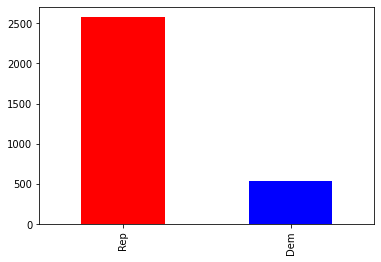

In [32]:
election_data_gdf['outcome'].value_counts().plot(kind='bar', color=['r','b'])

election_data_gdf['outcome'].value_counts()

* on a map at the county level

<AxesSubplot:>

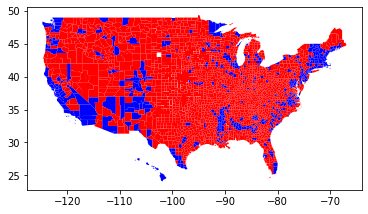

In [33]:
election_data_gdf.plot(column='outcome',
                       cmap='bwr'
                      )

#### Plotting the `per_point_diff`

* A boxplot is a good choice to look at the distribution of a continue variable like `per_point_diff` by category, here `outcome`

outcome
Dem    0.230645
Rep    0.431684
Name: per_point_diff, dtype: float64

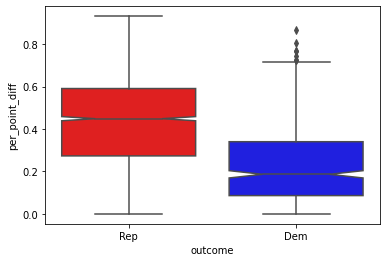

In [34]:
sns.boxplot(x='outcome', y='per_point_diff', 
            data=election_data_gdf,
            palette={'Rep': '#ff0000',
                     'Dem': '#0000ff' },
            notch=True
           )

election_data_gdf.groupby('outcome')['per_point_diff'].mean()

* This more clearly illustrates what you were trying to get at with the scatter plot above I think. For the counties won by Republicans there was a large point difference that for those won by Democrats.


* For a map plot, instead of a categorical plot we could use the `per_point_diff` column combined with the outcome column to create minues values for Dem and positive values for Rep.

In [35]:
election_data_gdf['per_point_diff_outcome']=election_data_gdf['per_point_diff'] * np.where(election_data_gdf['outcome']=='Dem', -1, 1)

# show new variable
election_data_gdf[['outcome', 'per_point_diff_outcome']].sample(10)

,outcome,per_point_diff_outcome
271,Dem,-0.443474
796,Rep,0.613971
128,Rep,0.466786
2367,Rep,0.371433
2150,Rep,0.021351
871,Rep,0.072279
249,Rep,0.412889
1582,Rep,0.387680
732,Dem,-0.138121
2000,Rep,0.341262


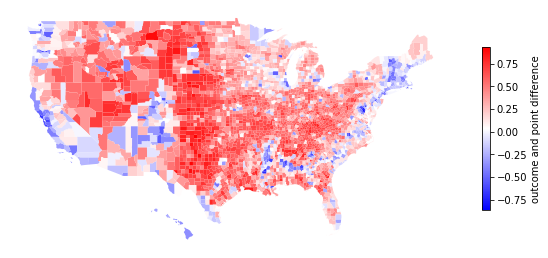

In [36]:
election_data_gdf.plot(column='per_point_diff_outcome',
                       cmap='bwr', legend=True,
                       figsize=(10,10),
                       legend_kwds={'shrink': 0.3,
                                    'label': 'outcome and point difference'}
                      )
plt.axis('off')
plt.show()

* This seems to illustrate some interesting patterns and combines outcome and strength that outcome


* However, the `bwr` colormap (sounds for `blue-white-red`) points values close to 0 in the white color band which means we lose the outcome (blue or red).


* There isn't a predefined 'BlueRed' colormap but we can define one
    * It requires some `matplotlib` functions and a change to the plotting

In [37]:
# define a colormap that goes from Blue (b) to Red (r)
cm1 = mcol.LinearSegmentedColormap.from_list("BlueRed",["b","r"])

# normalize the scale from -1 to 1 to match the per_point_diff_outcome column
cnorm = mcol.Normalize(vmin=-1,vmax=1)

# create a cmap object we can pass values to
cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)

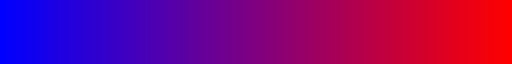

In [38]:
# look at our color map
cm1

* now we can plot the `per_point_diff_outcome` variable onto the county map

* instead of the `column` argument we have to pass a color for each row by using the `cpick` colormap object

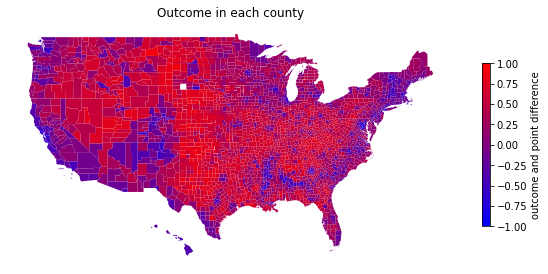

In [39]:
election_data_gdf.plot(color=cpick.to_rgba(election_data_gdf['per_point_diff_outcome']),
                       figsize=(10,10))
                       
plt.axis('off')
plt.colorbar(cpick, shrink=0.3,
             label='outcome and point difference')
plt.title("Outcome in each county")


plt.show()

* TBH I am not sure this communicates any better but it does have the advantage of keeping the outcome clearly visible. But it makes the point difference less obvious. Purple means low point difference with either a red or blue outcome. Whereas in the previous version this was the white band of colors.


### voting outcome associated with % insured, i.e. less security for health care the redder the state

In [40]:
socioeconomic_df = pd.read_csv('../data/socioeconomic_data_clean.csv')

In [41]:
election_data_cleaned_df.head()

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,county_fips,outcome,state_proportion,fips
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,1001,Rep,NaN,01001
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1003,Rep,NaN,01003
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,1005,Rep,NaN,01005
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,1007,Rep,NaN,01007
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,1009,Rep,NaN,01009


In [42]:
socioeconomic_df

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,County Name,% Severe Housing Problems,% Uninsured,High school graduation rate,% Unemployed,Income Inequality,Median household income,% Rural,Residential Segregation,Median household income (White),Median household income (Black),Population
0,0,0,0,US,United States,0.179136,0.102234,0.846000,0.038953,4.920018,61937.0,0.192690,46.773464,NaN,NaN,327167434.0
1,1,0,1000,AL,Alabama,0.143407,0.110448,0.893000,0.039336,5.261136,49881.0,0.409632,50.777776,NaN,NaN,4887871.0
2,1,1,1001,AL,Autauga County,0.146635,0.087217,0.900000,0.036291,5.234597,59338.0,0.420022,23.628395,65047.0,27643.0,55601.0
3,1,3,1003,AL,Baldwin County,0.135662,0.113334,0.863616,0.036154,4.417767,57588.0,0.422791,31.825343,59418.0,31112.0,218022.0
4,1,5,1005,AL,Barbour County,0.145833,0.122428,0.814103,0.051714,5.681410,34382.0,0.677896,23.449713,47031.0,23013.0,24881.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,0.098579,0.144650,0.805000,0.042364,3.975923,73315.0,0.109163,25.352653,76469.0,NaN,43051.0
3190,56,39,56039,WY,Teton County,0.169679,0.160345,0.877660,0.030248,3.775274,99087.0,0.464309,29.044724,95222.0,NaN,23081.0
3191,56,41,56041,WY,Uinta County,0.114401,0.136647,0.846875,0.043668,4.350061,63401.0,0.430959,11.577927,61330.0,NaN,20299.0
3192,56,43,56043,WY,Washakie County,0.100143,0.167303,0.845361,0.042385,3.327463,55190.0,0.359545,10.866451,54815.0,NaN,7885.0


In [43]:
election_data_cleaned_df['fips_int'] = election_data_cleaned_df['fips'].astype(int)

/tmp/ipykernel_1435685/1955395861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_data_cleaned_df['fips_int'] = election_data_cleaned_df['fips'].astype(int)


In [44]:
combined_df=pd.merge(socioeconomic_df,
         election_data_cleaned_df,
         left_on='5-digit FIPS Code',
         right_on='fips_int')

<AxesSubplot:xlabel='outcome', ylabel='% Uninsured'>

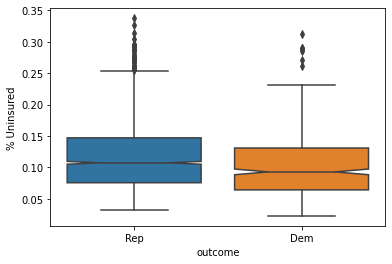

In [45]:
sns.boxplot(x='outcome', y='% Uninsured', 
            data=combined_df, notch=True)

outcome
Dem    0.192905
Rep    0.644523
Name: % Rural, dtype: float64

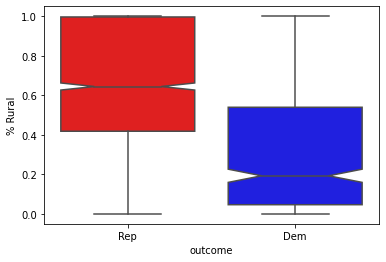

In [46]:
sns.boxplot(x='outcome', y='% Rural', 
            data=combined_df, notch=True,
            palette=['r','b'])

combined_df.groupby('outcome')['% Rural'].median()

In [47]:
rural_df = combined_df[combined_df['% Rural']>.9]

<AxesSubplot:xlabel='outcome', ylabel='% Rural'>

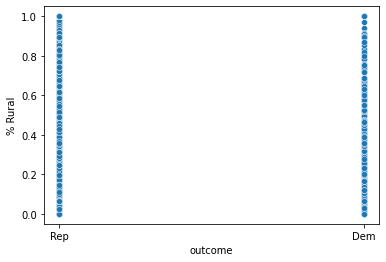

In [48]:
sns.scatterplot(x='outcome', y='% Rural', data=combined_df)

In [49]:
combined_df.groupby('outcome')['% Uninsured'].describe()

,count,mean,std,min,25%,50%,75%,max
outcome,,,,,,,,
Dem,538.0,0.102331,0.047631,0.022627,0.064096,0.092760,0.130777,0.312079
Rep,2574.0,0.116567,0.051441,0.031730,0.075492,0.107211,0.146967,0.337496


In [50]:
combined_df['per_point_diff_outcome']=np.where(combined_df['outcome']=='Rep',1,-1)*combined_df['per_point_diff']

<AxesSubplot:xlabel='% Uninsured', ylabel='per_point_diff_outcome'>

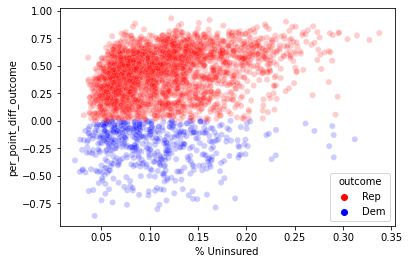

In [51]:
sns.scatterplot(x='% Uninsured', y='per_point_diff_outcome', hue='outcome',
                palette=['r', 'b'], alpha=0.2,
                data=combined_df)

If a county has very high levels of uninsurance, it is extremely likely to vote Republican. Furthermore, it is very likely to not only vote Republican, but vote Republican by a landslide.

Can we compare average number of health care providers in the staunchly Republican, highly uninsured counties to the mean across all counties? Perhaps these counties are not interested in having health insurance because they do not have access to healthcare anyway.

In [52]:
unins_filter=combined_df["% Uninsured"] > 0.2
rep_filter=combined_df['outcome']=='Rep'
outliers_df=combined_df[unins_filter & rep_filter]

In [53]:
pd.cut(combined_df['% Uninsured'], 5)

0       (0.0856, 0.149]
1       (0.0856, 0.149]
2       (0.0856, 0.149]
3       (0.0856, 0.149]
4       (0.0856, 0.149]
             ...       
3107    (0.0856, 0.149]
3108     (0.149, 0.212]
3109    (0.0856, 0.149]
3110     (0.149, 0.212]
3111    (0.0856, 0.149]
Name: % Uninsured, Length: 3112, dtype: category
Categories (5, interval[float64, right]): [(0.0223, 0.0856] < (0.0856, 0.149] < (0.149, 0.212] < (0.212, 0.275] < (0.275, 0.337]]

In [54]:
combined_df.columns

Index(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'State',
       'County Name', '% Severe Housing Problems', '% Uninsured',
       'High school graduation rate', '% Unemployed', 'Income Inequality',
       'Median household income', '% Rural', 'Residential Segregation',
       'Median household income (White)', 'Median household income (Black)',
       'Population', 'state_name', 'county_name', 'votes_gop', 'votes_dem',
       'total_votes', 'diff', 'per_gop', 'per_dem', 'per_point_diff',
       'county_fips', 'outcome', 'state_proportion', 'fips', 'fips_int',
       'per_point_diff_outcome'],
      dtype='object')

In [55]:
rural_df['outcome'].value_counts()

Rep    689
Dem     54
Name: outcome, dtype: int64

<AxesSubplot:xlabel='outcome', ylabel='per_point_diff'>

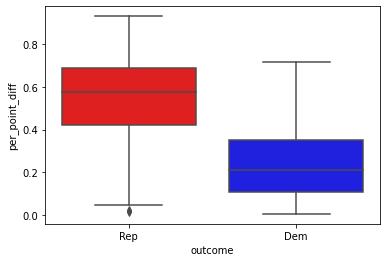

In [56]:
sns.boxplot(x='outcome', y='per_point_diff', data=rural_df, palette=['r','b'])

In [57]:
urban_df=combined_df[combined_df['% Rural']<0.1]

In [58]:
urban_df.shape

(250, 31)

In [59]:
urban_df['outcome'].value_counts()

Dem    191
Rep     59
Name: outcome, dtype: int64

<AxesSubplot:xlabel='outcome', ylabel='% Uninsured'>

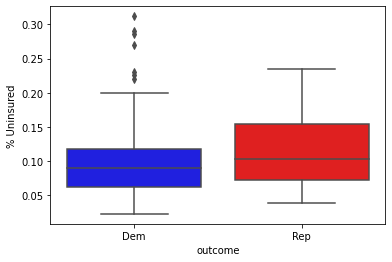

In [60]:
sns.boxplot(x='outcome', y='% Uninsured', 
            data=urban_df, palette=['b','r'])